In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise

In [52]:
#Funcion util para encontrar minimos locales.
%matplotlib inline
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

In [53]:
#Región.
#https://ourworldindata.org/coronavirus-source-data
data = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\owid-covid-data-10-01.csv')
df =pd.DataFrame(data)

#Francia
Francedata=df.loc[df['location']=='France']
Francets=np.array(Francedata.new_cases).astype(float)

#Chile
Chiledata=df.loc[df['location']=='Chile']
Chilets=np.array(Chiledata.new_cases).astype(float)

#Alemania
Alemaniadata=df.loc[df['location']=='Germany']
Alemaniats=np.array(Alemaniadata.new_cases).astype(float)

#Mexico
Mexicodata=df.loc[df['location']=='Mexico']
Mexicots=np.array(Mexicodata.new_cases).astype(float)
Mexicots=Mexicots[58:]

#Japan
Japandata=df.loc[df['location']=='Japan']
Japants=np.array(Japandata.new_cases).astype(float)
Japants=Japants[1:]

#Republica Dominicana
DRdata=Francedata=df.loc[df['location']=='Dominican Republic']
DRts=np.array(DRdata.new_cases).astype(float)

#Estados Unidos
USdata=Francedata=df.loc[df['location']=='United States']
USts=np.array(USdata.new_cases).astype(float)
USts=USts[1:]


#RM y NY
#Nueva York.
datany = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\coronavirus-data-master-NY-10-01\coronavirus-data-master\trends\cases-by-day.csv')
df=pd.DataFrame(datany)
NYdata=np.array(df.CASE_COUNT).astype(float)
NYts=NYdata

#Region Metropolitana.
#https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto3/TotalesPorRegion_std.csv
datarm = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\Datos-COVID19-master-10-01\Datos-COVID19-master\output\producto3\TotalesPorRegion_std.csv')
df=pd.DataFrame(datarm)
rmdata=df.loc[df['Region']=='Metropolitana']
RMdataDc=rmdata.loc[df['Categoria']=='Casos nuevos totales']
rmts=np.array(RMdataDc.Total).astype(float)
RMts=rmts

#Londres.
datalondon = pd.read_csv(r'C:\Users\javie\Desktop\Modelamiento\Datos\London-data_2021-Jan-11.csv')
df=pd.DataFrame(datalondon)
Londonts=np.array(df.newCasesBySpecimenDate).astype(float)
Londonts=Londonts[::-1]
Londonts=Londonts/max(Londonts)

# Por paises

In [54]:
Time_series=[USts/max(USts), DRts/max(DRts), Chilets/max(Chilets), Francets/max(Francets), Alemaniats/max(Alemaniats), Japants/max(Japants), Mexicots/max(Mexicots)]

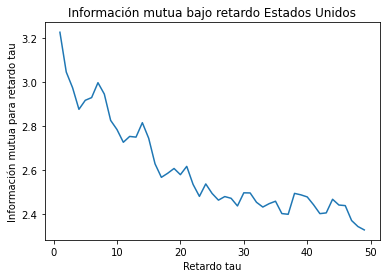

Los mínimos locales se alcanzan para tau=[ 4 11 13 17 20 23 26 29 33 37 42]


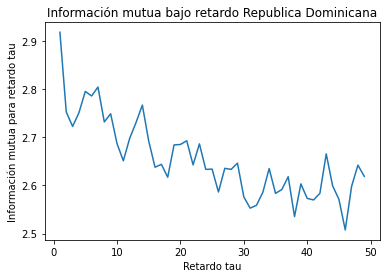

Los mínimos locales se alcanzan para tau=[ 3  6  8 11 16 18 22 24 26 28 31 35 38 41 46]


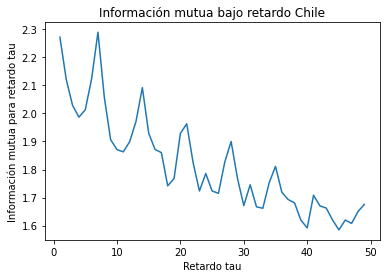

Los mínimos locales se alcanzan para tau=[ 4 11 18 23 26 30 33 40 45 47]


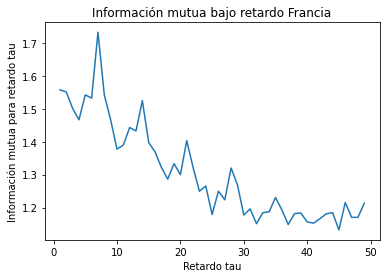

Los mínimos locales se alcanzan para tau=[ 4  6 10 13 18 20 23 25 27 30 32 37 41 45 48]


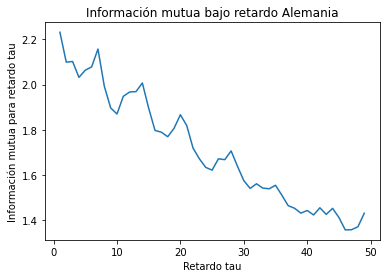

Los mínimos locales se alcanzan para tau=[ 2  4 10 18 25 27 31 34 39 41 43 46]


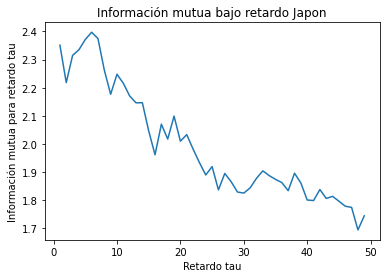

Los mínimos locales se alcanzan para tau=[ 2  9 13 16 18 20 24 26 30 37 41 43 48]


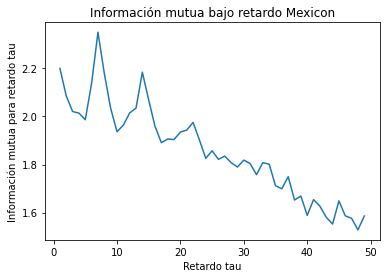

Los mínimos locales se alcanzan para tau=[ 5 10 17 19 24 26 29 32 36 38 40 44 48]


In [55]:
for i in range(len(Time_series)):
    X=Time_series[i]
    #Calculo de la información mutua entre X_t, X_(t+tau)
    time_delay_mi=np.zeros(49)
    for tau in range(1,50):
        td=delay.mi(X[:-tau],X[tau:])
        time_delay_mi[tau-1]=td
    if i==0:
        plt.title('Información mutua bajo retardo Estados Unidos')
    if i==1:
        plt.title('Información mutua bajo retardo Republica Dominicana')
    if i==2:
        plt.title('Información mutua bajo retardo Chile')
    if i==3:
        plt.title('Información mutua bajo retardo Francia')
    if i==4:
        plt.title('Información mutua bajo retardo Alemania')
    if i==5:
        plt.title('Información mutua bajo retardo Japon')
    if i==6:
        plt.title('Información mutua bajo retardo Mexicon')
    plt.plot(range(1,50),time_delay_mi)
    plt.xlabel('Retardo tau')
    plt.ylabel('Información mutua para retardo tau')
    plt.show()
    print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay_mi)+1))

In [56]:
Tau=[4,3,4,4,4,9,5]

# Atractores 3d.

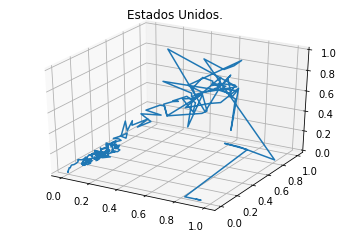

In [57]:
#US
tau_to_use=4
data=USts/max(USts)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Estados Unidos.')
plt.show()

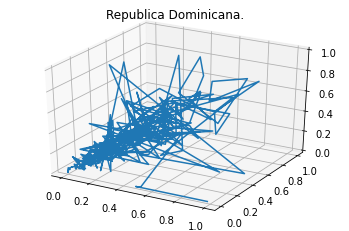

In [58]:
#RD
tau_to_use=3
data=DRts/max(DRts)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Republica Dominicana.')
plt.show()

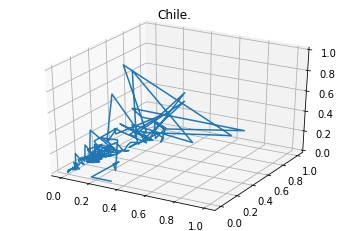

In [59]:
#Chile
tau_to_use=4
data=Chilets/max(Chilets)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Chile.')
plt.show()

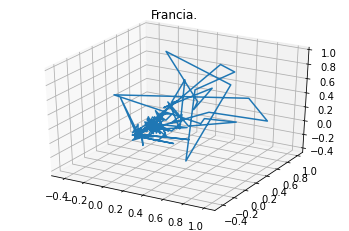

In [60]:
#France
tau_to_use=4
data=Francets/max(Francets)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Francia.')
plt.show()

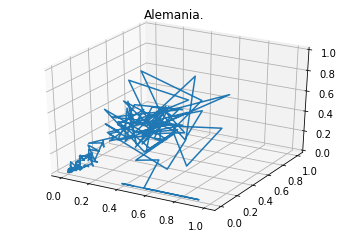

In [61]:
#Alemania
tau_to_use=4
data=Alemaniats/max(Alemaniats)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Alemania.')
plt.show()

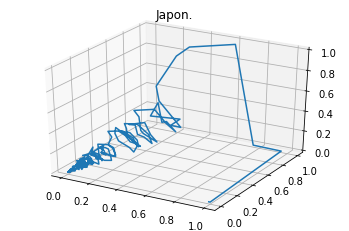

In [62]:
#Japan
tau_to_use=2
data=Japants/max(Japants)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Japon.')
plt.show()

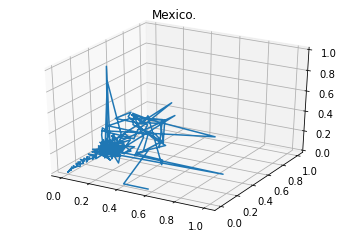

In [63]:
#Mexico
tau_to_use=5
data=Mexicots/max(Mexicots)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Mexico.')
plt.show()

# Estimación dimensión de inmersión.

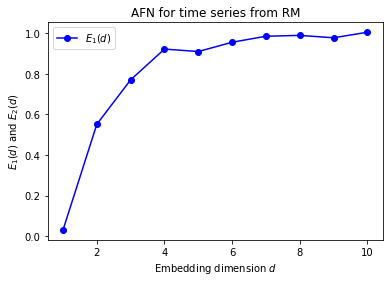

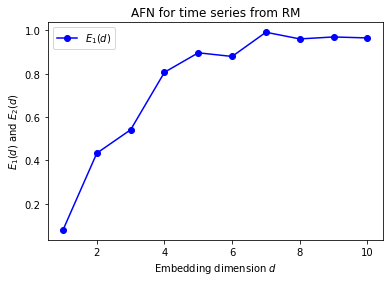

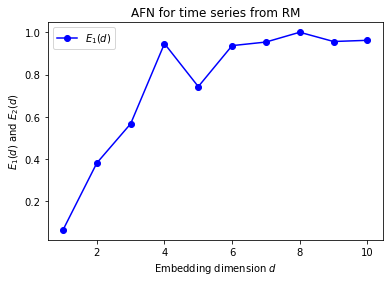

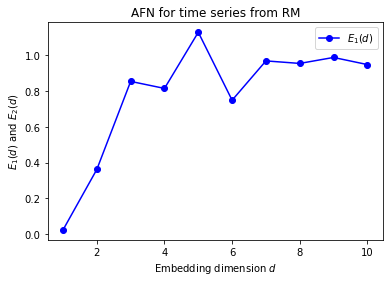

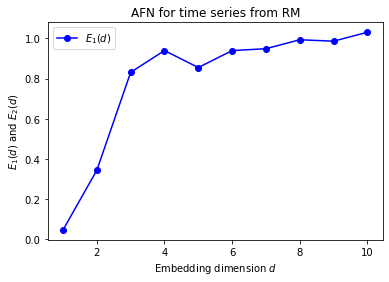

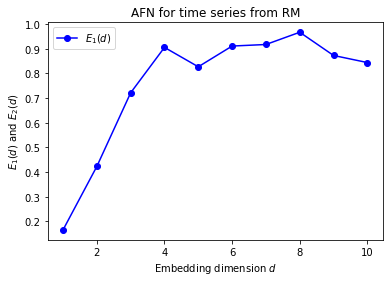

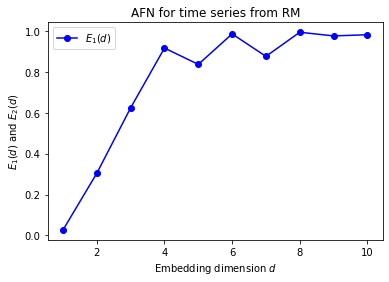

In [64]:
#Tira un error para la serie de Londres revisar porque.
for i in range(len(Time_series)):
    X=Time_series[i]
    # AFN algorithm.
    dim = np.arange(1,10 + 2)
    E, Es = dimension.afn(X, tau=Tau[i], dim=dim, window=50)
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.title(r'AFN for time series from RM')
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    #plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
    plt.legend()
    plt.show()

In [65]:
Embdim=[4,5,4,5,4,5,4]

# Estimación.

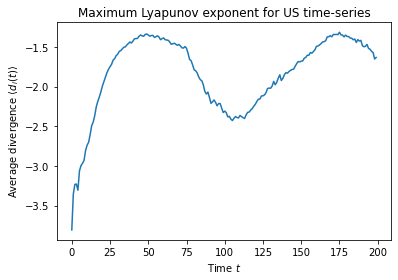

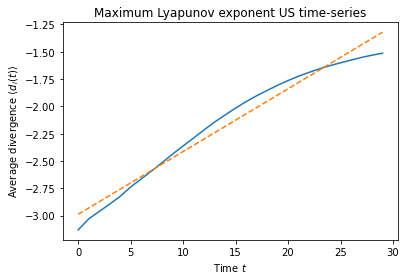

Linear fitting coeficient=0.05744307409148884


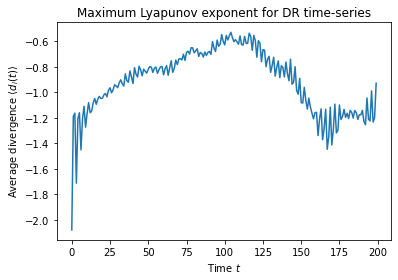

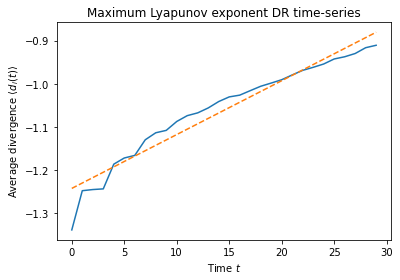

Linear fitting coeficient=0.01245713045006549


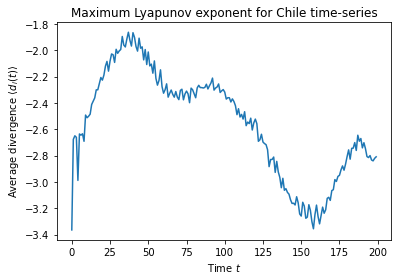

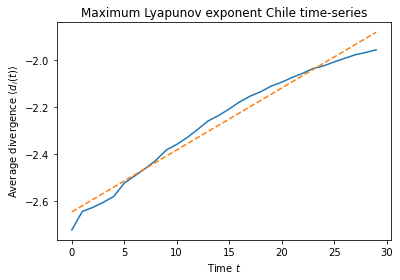

Linear fitting coeficient=0.02639168848162821


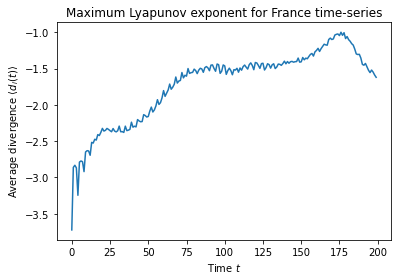

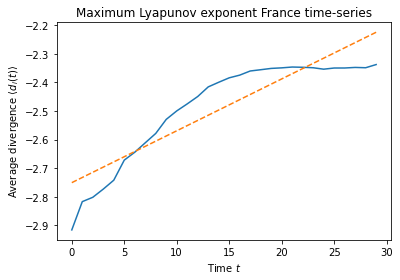

Linear fitting coeficient=0.018139148813194766


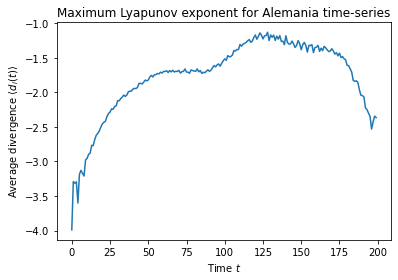

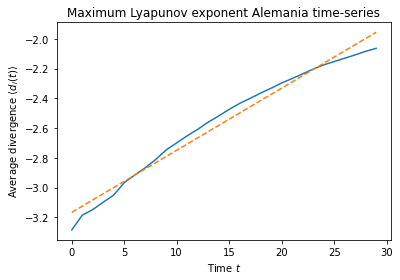

Linear fitting coeficient=0.04174202957131984


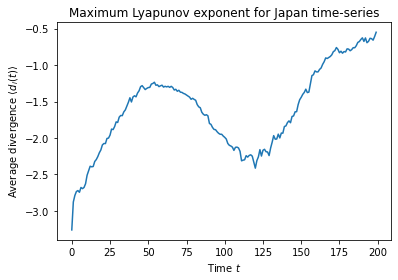

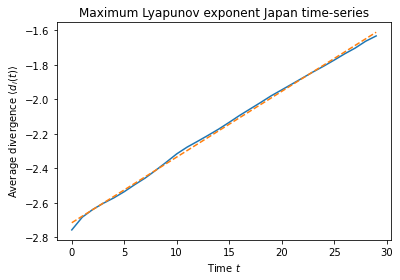

Linear fitting coeficient=0.03810745757977106


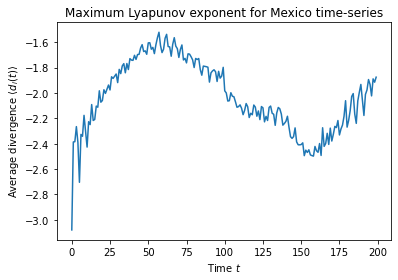

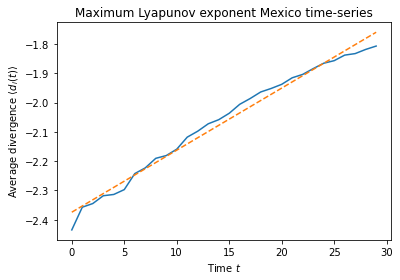

Linear fitting coeficient=0.02117070495238056


In [66]:
MLEs_nolitsa=np.zeros(7)
Ciudades=['US', 'DR', 'Chile', 'France', 'Alemania', 'Japan', 'Mexico']
for i in range(len(Time_series)):
    X=Time_series[i]
    LEs=lyapunov.mle_embed(X, dim=[Embdim[i]], tau=Tau[i], window=20, maxt=200)[0]
    plt.plot(range(len(LEs)),LEs)
    plt.title('Maximum Lyapunov exponent for '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.show()

    sma=noise.sma(LEs[:40], hwin=5)
    plt.title('Maximum Lyapunov exponent '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.plot(np.arange(len(sma)),sma)
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    plt.plot(xaxis, yaxis, '--')
    plt.show()
    print('Linear fitting coeficient='+str(p[0]))
    MLEs_nolitsa[i]=p[0]

In [67]:
#Nolds
MLEs_nolds=np.zeros(7)
for i in range(len(Time_series)):
    X=Time_series[i]
    MLEs_nolds[i]=nolds.lyap_r(X, emb_dim=Embdim[i], lag=Tau[i], min_tsep=20,tau=1, 
                     min_neighbors=30, trajectory_len=30, fit='RANSAC', 
                     debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)

In [68]:
print("Valor obtenido de MLE con nolitsa: "+str(MLEs_nolitsa*365))
print("Valor obtenido de MLE con nolds: "+str(MLEs_nolds*365))
#En bit/año

Valor obtenido de MLE con nolitsa: [20.96672204  4.54685261  9.6329663   6.62078932 15.23584079 13.90922202
  7.72730731]
Valor obtenido de MLE con nolds: [27.58112139  5.4973272   9.95250624 13.1561377  22.07877064 17.17603442
  8.73404977]


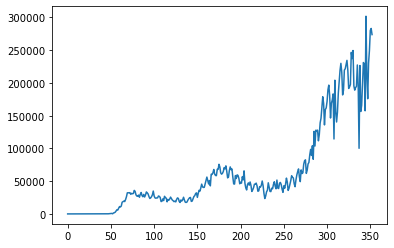

In [79]:
plt.plot(USts)

# Ciudades.

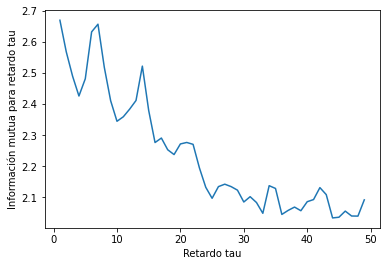

Los mínimos locales se alcanzan para tau=[ 4 10 16 19 25 30 33 36 39 44 48]


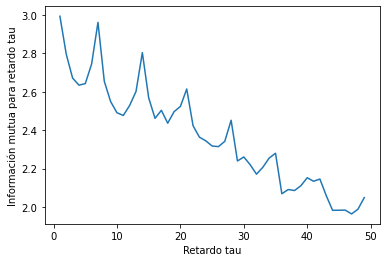

Los mínimos locales se alcanzan para tau=[ 4 11 16 18 26 29 32 36 38 41 44 47]


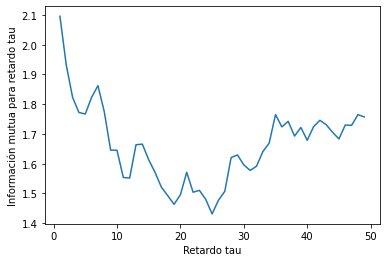

Los mínimos locales se alcanzan para tau=[ 5 12 19 22 25 31 36 38 40 45 47]


In [69]:
Time_series=[RMts/max(RMts), NYts/max(NYts), Londonts/max(Londonts)]
for i in range(len(Time_series)):
    X=Time_series[i]/max(Time_series[i])
    #Calculo de la información mutua entre X_t, X_(t+tau)
    time_delay_mi=np.zeros(49)
    for tau in range(1,50):
        td=delay.mi(X[:-tau],X[tau:])
        time_delay_mi[tau-1]=td
    plt.plot(range(1,50),time_delay_mi)
    plt.xlabel('Retardo tau')
    plt.ylabel('Información mutua para retardo tau')
    plt.show()
    print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay_mi)+1))

In [70]:
Tau=[4,4,5]

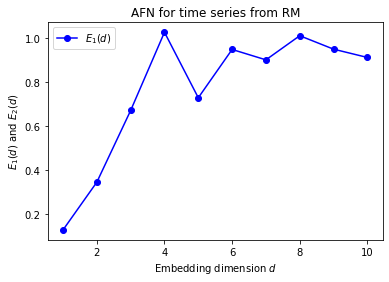

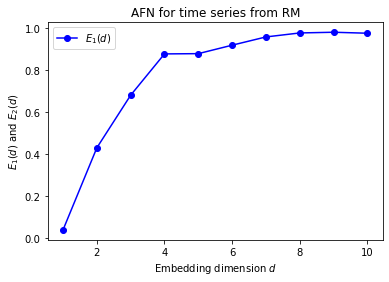

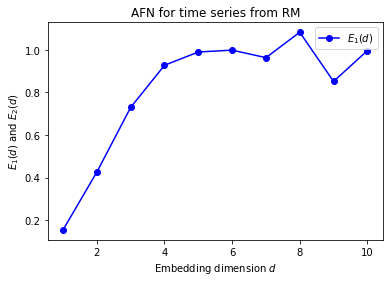

In [71]:
#Tira un error para la serie de Londres revisar porque.
for i in range(len(Time_series)):
    X=Time_series[i]
    # AFN algorithm.
    dim = np.arange(1,10 + 2)
    E, Es = dimension.afn(X, tau=Tau[i], dim=dim, window=50)
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.title(r'AFN for time series from RM')
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    #plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
    plt.legend()
    plt.show()

In [72]:
Embdim=[4,3,4]

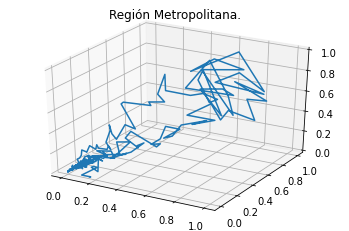

In [73]:
#RM
tau_to_use=4
data=RMts/max(RMts)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Región Metropolitana.')
plt.show()

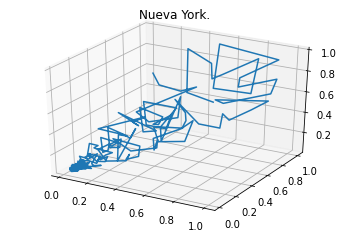

In [74]:
#Nueva York
tau_to_use=4
data=NYts[20:-20]/max(NYts[20:-20])
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Nueva York.')
plt.show()

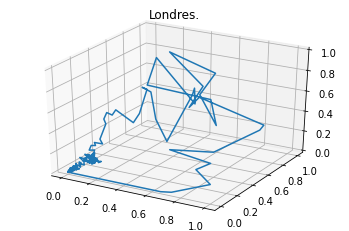

In [75]:
#Londres
tau_to_use=5
data=Londonts/max(Londonts)
data_lag0 = data.flatten()
data_lag1 = np.roll(data, -tau_to_use).flatten()
data_lag2 = np.roll(data, -2 * tau_to_use).flatten()

# Plot time delay embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data_lag0, data_lag1, data_lag2)
plt.title('Londres.')
plt.show()

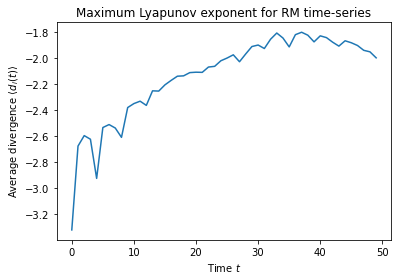

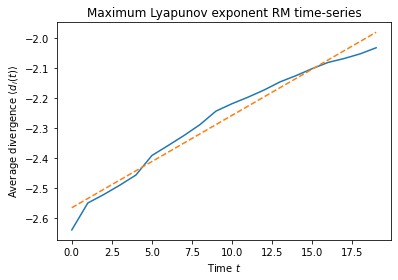

Linear fitting coeficient=0.030912120311504303


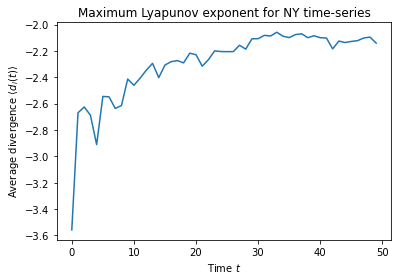

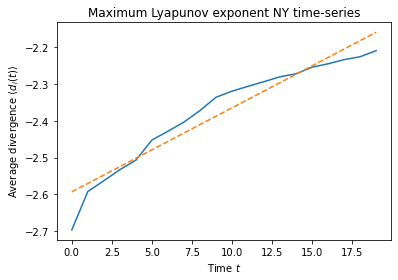

Linear fitting coeficient=0.022881928746728075


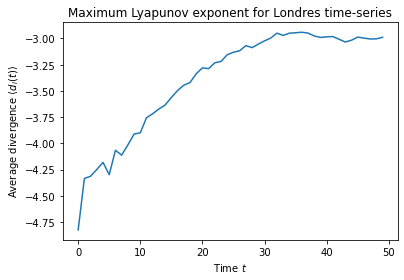

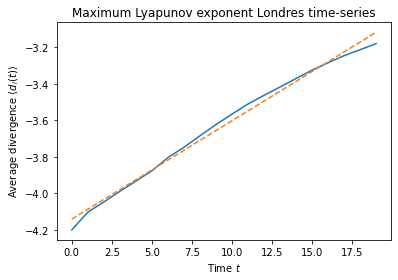

Linear fitting coeficient=0.05394763782923122


In [76]:
MLEs_nolitsa=np.zeros(3)
Ciudades=['RM', 'NY','Londres']
for i in range(len(Time_series)):
    X=Time_series[i]
    LEs=lyapunov.mle_embed(X, dim=[Embdim[i]], tau=Tau[i], window=10, maxt=50)[0]
    plt.plot(range(len(LEs)),LEs)
    plt.title('Maximum Lyapunov exponent for '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.show()

    sma=noise.sma(LEs[:30], hwin=5)
    plt.title('Maximum Lyapunov exponent '+ Ciudades[i]+ ' time-series')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
    plt.plot(np.arange(len(sma)),sma)
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    plt.plot(xaxis, yaxis, '--')
    plt.show()
    print('Linear fitting coeficient='+str(p[0]))
    MLEs_nolitsa[i]=p[0]

In [77]:
#Nolds
MLEs_nolds=np.zeros(3)
for i in range(len(Time_series)):
    X=Time_series[i]
    MLEs_nolds[i]=nolds.lyap_r(X, emb_dim=Embdim[i], lag=Tau[i], min_tsep=20,tau=1, 
                     min_neighbors=30, trajectory_len=30, fit='RANSAC', 
                     debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)

In [78]:
print("Valor obtenido de MLE con nolitsa: "+str(MLEs_nolitsa*365))
print("Valor obtenido de MLE con nolds: "+str(MLEs_nolds*365))
#En bit/año

Valor obtenido de MLE con nolitsa: [11.28292391  8.35190399 19.69088781]
Valor obtenido de MLE con nolds: [13.09983419 15.90843151 24.93656635]
